In [7]:
import import_ipynb

In [9]:
from collections import defaultdict
from gridworld import GridWorld
from policy_eval import policy_eval

In [3]:
def argmax(d):
    """d (dict)"""
    max_value = max(d.values())
    max_key = -1
    for key, value in d.items():
        if value == max_value:
            max_key = key
    return max_key

In [4]:
def greedy_policy(V, env, gamma):
    pi = {}

    for state in env.states():
        action_values = {}

        for action in env.actions():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            value = r + gamma * V[next_state]
            action_values[action] = value

        max_action = argmax(action_values)
        action_probs = {0: 0, 1: 0, 2: 0, 3: 0}
        action_probs[max_action] = 1.0
        pi[state] = action_probs
    return pi

In [5]:
def policy_iter(env, gamma, threshold=0.001, is_render=True):
    pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})
    V = defaultdict(lambda: 0)

    while True:
        V = policy_eval(pi, V, env, gamma, threshold)  # 평가
        new_pi = greedy_policy(V, env, gamma)          # 개선

        if is_render:
            env.render_v(V, pi)

        if new_pi == pi:  # 갱신 여부 확인
            break
        pi = new_pi

    return pi

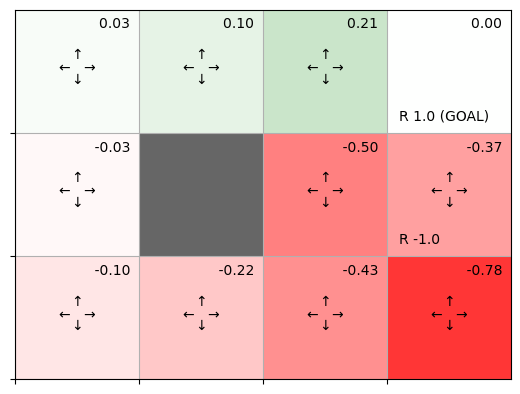

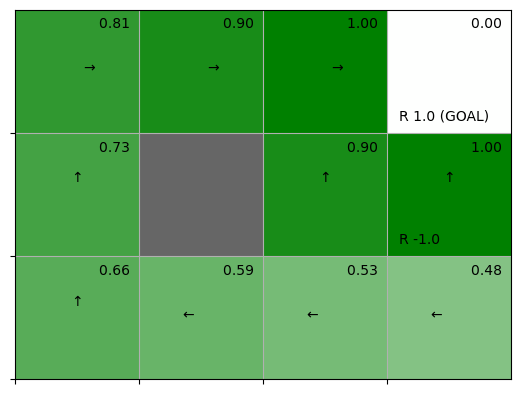

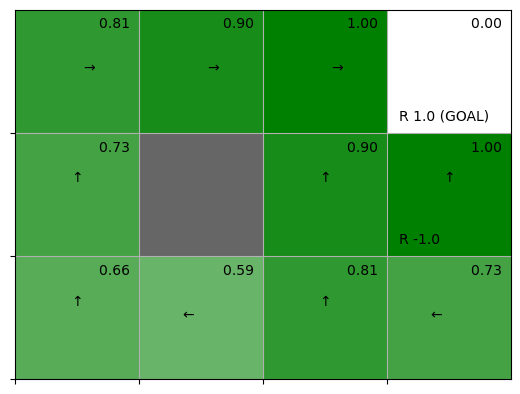

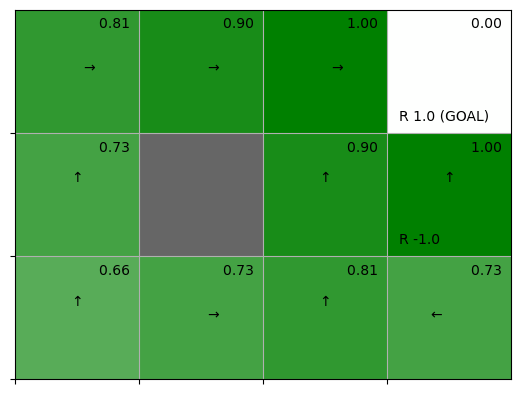

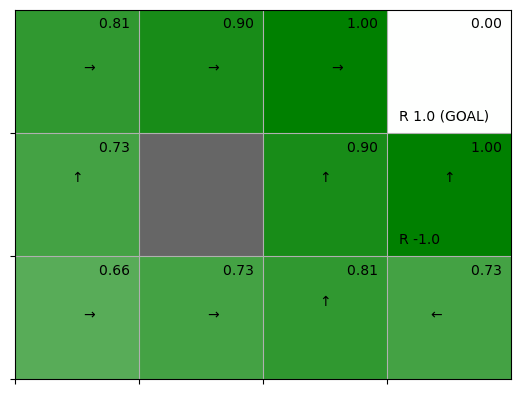

In [6]:
env = GridWorld()
gamma = 0.9
pi = policy_iter(env, gamma)